In [2]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Insurance_dataset=pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [4]:
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
Insurance_dataset.shape

(1338, 7)

In [6]:
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
Insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
Insurance_dataset.isnull().sum().sum()

0

In [12]:
Insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
#we need to convert Categorical data into numeric data ---> Sex, smoker , region
Insurance_dataset.replace({'sex': {'male':1,'female':0}}, inplace=True)
Insurance_dataset.replace({'smoker':{'yes':1, 'no':0}},inplace=True)
Insurance_dataset.replace({"region":{'southwest':1, 'northwest':0,'northeast':3,'southeast':4}},inplace=True)

In [14]:
Insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,0,10600.5483
1334,18,0,31.92,0,0,3,2205.9808
1335,18,0,36.85,0,0,4,1629.8335
1336,21,0,25.80,0,0,1,2007.9450
1337,61,0,29.07,0,1,0,29141.3603


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


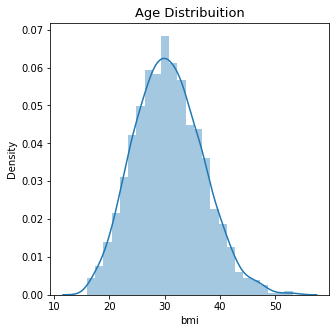

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(Insurance_dataset['bmi'])
plt.title('Age Distribuition', fontsize=13)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


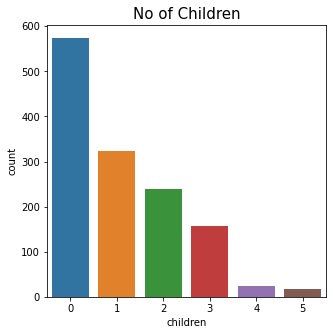

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(Insurance_dataset['children']) #or sns.countplot(x='children', data=Insurance_dataset)
plt.title('No of Children',fontsize=15)
plt.show()

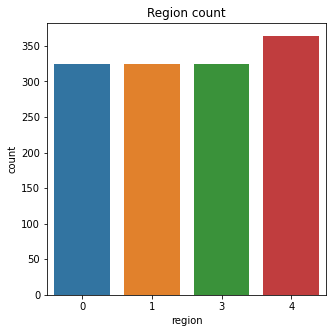

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=Insurance_dataset)
plt.title('Region count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


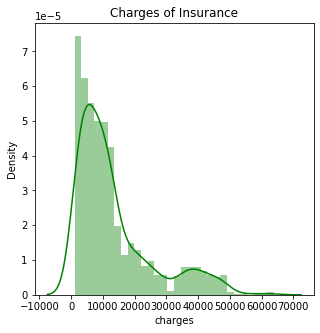

In [29]:
plt.figure(figsize=(5,5))
sns.distplot(Insurance_dataset['charges'],color='g')
plt.title('Charges of Insurance')
plt.show()

In [30]:
#Splitting dataset into dependent x and independent y varaibles
X=Insurance_dataset.drop(columns='charges',axis=1)
y=Insurance_dataset['charges']

In [31]:
print(X.shape, y.shape)

(1338, 6) (1338,)


##Train_Test_Split



In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train ,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


##Model Evaluation

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
Regressor=LinearRegression()

In [37]:
Regressor.fit(X_train , y_train)

LinearRegression()

In [38]:
Regressor.score(X_test, y_test)

0.748583229568009

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [55]:
X_data_train=sc.fit_transform(X_train)

In [59]:
X_data_test=sc.fit_transform(X_test)

In [64]:
Regressor.fit(X_data_train, y_train) #sacling always applied on X_train, X_test data , y_train,y_test remains same


LinearRegression()

In [65]:
Regressor.score(X_data_test, y_test)  # see no effect 

0.7449856755569157

##Mean_squared_error

In [82]:
X_test_prediction=Regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [85]:
from sklearn import metrics 
r2_test=metrics.r2_score(X_test_prediction,y_test)

In [86]:
print('r2_score',r2_test)

r2_score -14.319682722862197


#Prediction System

In [66]:
input_data=(21,0,25.80,0,0,1)

prediction=Regressor.predict([input_data])

In [67]:
print(prediction)

[134173.83287518]


##Saving Model

In [68]:
import pickle

In [71]:
pickle.dump(Regressor, open('Insurance_prediction','wb'))

In [72]:
Model=pickle.load(open('Insurance_prediction','rb'))

In [74]:
input_data=(18,0,31.92,0,0,3)

predicted_charges=Model.predict([input_data])

In [75]:
print('Amount of Insurance would be --> ',predicted_charges)

Amount of Insurance would be -->  [134835.43472889]
